## Practice in Pytorch

For installation of pytorch go to 
   > Pytorch Website: http://pytorch.org/
   
   > Git repo: https://github.com/pytorch/pytorch 

In [1]:
from torch import Tensor # import tensor
import torch
import numpy

In [2]:
vector = Tensor(6) # make a vector

In [3]:
vector.size() # check vector size

torch.Size([6])

In [4]:
vector.fill_(2.4) # fill the tensor. In place operations are indexed with an underscore


 2.4000
 2.4000
 2.4000
 2.4000
 2.4000
 2.4000
[torch.FloatTensor of size 6]

In [5]:
print ( " \n mean is : ", vector.mean(), " \n standard deviation is : " ,vector.std(),"\n sum of vector values is : ", vector.sum())

 
 mean is :  2.4000000953674316  
 standard deviation is :  0.0 
 sum of vector values is :  14.40000057220459


### Narrowing  Tensors  

In [6]:
matrix = Tensor(4,5).zero_()

In [7]:
matrix


 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
[torch.FloatTensor of size 4x5]

In [8]:
matrix.narrow(0,2,2).fill_(2) # narrowing along the row --- first vakue is 0, 
                              # 1 would represent column
                              # then pick 2,2 along the indicated index (2,2) and fill with 1


 2  2  2  2  2
 2  2  2  2  2
[torch.FloatTensor of size 2x5]

In [9]:
matrix # matrix filled with 2


 0  0  0  0  0
 0  0  0  0  0
 2  2  2  2  2
 2  2  2  2  2
[torch.FloatTensor of size 4x5]

In [10]:
matrix.narrow(1,2,2).fill_(2) # narrowing along the row --- first vakue is 0, 



 2  2
 2  2
 2  2
 2  2
[torch.FloatTensor of size 4x2]

In [11]:
matrix #  filled with 2 along the column


 0  0  2  2  0
 0  0  2  2  0
 2  2  2  2  2
 2  2  2  2  2
[torch.FloatTensor of size 4x5]

In [12]:
matrix_2 = Tensor(7,5).zero_() # test another matric

In [13]:
matrix_2.narrow(1,2,3).fill_(2) # fill along column



    2     2     2
    2     2     2
    2     2     2
    2     2     2
    2     2     2
    2     2     2
    2     2     2
[torch.FloatTensor of size 7x3]

### Linear Operations

In [14]:
matrix_y = Tensor(5).normal_()

In [15]:
matrix_y # tensor filled with randomized normal density values


-0.2856
 1.3776
 1.0980
-0.4935
-1.8806
[torch.FloatTensor of size 5]

In [16]:
matrix_x = Tensor(5,5).normal_()

In [17]:
sol,_nill = torch.gels(matrix_y,matrix_x) # generalized linear solver used here

In [18]:
sol # solution


 5.0382
-0.9381
 4.6433
-4.7326
-2.2920
[torch.FloatTensor of size 5x1]

In [19]:
torch.mm(matrix_x,sol) # this gives back y


-0.2856
 1.3776
 1.0980
-0.4935
-1.8806
[torch.FloatTensor of size 5x1]

# Simple Linear Regression

In [20]:
data = torch.from_numpy(numpy.loadtxt('systolic-blood-pressure-vs-age.dat')).float() # load data as float

In [21]:
data[1:4]# view data


  19  124
  20  116
  21  120
[torch.FloatTensor of size 3x2]

In [22]:
data_size = data.size(0) # get size of data


In [23]:
matrix_x, matrix_y = torch.Tensor(data_size, 2), torch.Tensor(data_size, 1) # create tensor to hold imported data
                                                                    # note the tensor have size of data_size defined
                                                                    # in previous cell



### Note on Slicing

In [24]:
data[:4,:4]  # experiment with slicing 
            # this returns the first 4 elemt pair


  17  114
  19  124
  20  116
  21  120
[torch.FloatTensor of size 4x2]

In [25]:
data[3:,:3]  # slice data from 3rd element to last
            # results not shown
# Without the semicolumn the first value specify the row and the second value the column.
# We have just one column to select a particular element we have:

data[2, 1]# row 2 column 1

116.0

In [26]:
# Use semi column to select elements of the rowns and coluns respectively

In [27]:
data[:,0]  # take only first column
data[:,1]  # take only 2nd column column
data[0:3, 0:] # use the first slicing to slect the count of elements and the second index value  to control 
            # the number of columns retuened. With a semicolumn it returns all column starting from the value indicated


  17  114
  19  124
  20  116
[torch.FloatTensor of size 3x2]

In [ ]:
data[0:27, 1]# with semicolumn in 2nd index it returns only the column specified

### End of Note on Slicing

In [29]:
matrix_x[:,0] = data[:,0] # collect data of first column the x
matrix_x[:,1] = 1 # this is the boas term 


In [30]:
matrix_y[:,0] = data[:,1] # this holds the data for the second column the target



In [31]:
solved, _ = torch.gels(matrix_y, matrix_x) # solve fot alpha "N X 2 " matrix with "2X1" solution gives "NX1" solution



In [32]:
a, b = solved[0,0], solved[1, 0] # get the a and the b of the equation

In [33]:
# MAking plots

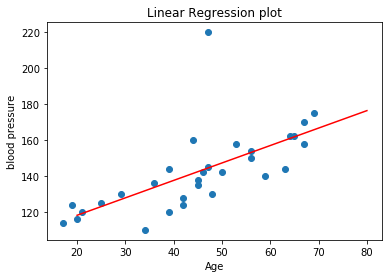

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis_val = torch.linspace(20, 80, 61)

plt.scatter(data[:,0].numpy(), data[:,1].numpy())
plt.plot(x_axis_val.numpy(), (a * x_axis_val + b).numpy(), 'r')
plt.title("Linear Regression plot")
plt.ylabel("blood pressure")
plt.xlabel("Age")

### More Operations (View--Reshape)

In [41]:
vector = torch.LongTensor([[2,3,6],[4,8,7]]) # 2D vector

In [42]:
vector.view(-1)


 2
 3
 6
 4
 8
 7
[torch.LongTensor of size 6]

In [43]:
vector.view(3,-1)


 2  3
 6  4
 8  7
[torch.LongTensor of size 3x2]

In [49]:
vector.narrow(1,0,2) # narrow along co


 2  3
 4  8
[torch.LongTensor of size 2x2]

In [53]:
# NArrowing along the 3D
vectors = torch.LongTensor([[[2,3,6],[4,8,7]],[[4,8,9],[9,5,7]]])

In [67]:
vectors.narrow(0,1,1) # narrow along the number of images, take/start the first matrix, and return


(0 ,.,.) = 
  4  8  9
  9  5  7
[torch.LongTensor of size 1x2x3]

In [68]:
vectors.narrow(2,0,2)


(0 ,.,.) = 
  2  3
  4  8

(1 ,.,.) = 
  4  8
  9  5
[torch.LongTensor of size 2x2x2]

## CIFAR IMAGE

In [12]:
import torchvision


In [13]:
cifar = torchvision.datasets.CIFAR10('./data/cifar10/', train = True, download=True)

In [16]:
x = torch.from_numpy(cifar.train_data).transpose(1,3).transpose(2,3) # transpose and chage data type

In [18]:
print(str(type(x)),x.size(), x.min(),x.max()) # size, min and max of data sets

<class 'torch.ByteTensor'> torch.Size([50000, 3, 32, 32]) 0 255


In [19]:
x = x.narrow(0,0,48).float().div(255)

In [20]:
torchvision.utils.save_image(x,"image_cifar.png",nrow=12)